## Read data

In [69]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [70]:
data = pd.read_csv('xclara.csv')

In [71]:
data.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


## Implementing K-means

### Define functions

In [72]:
def calculate_distance(data, centers):
    distance = np.zeros((len(data),len(centers)))
    for i, center in enumerate(np.array(centers)):
        diff = np.array(data)-center
        distance[:,i] = np.linalg.norm(diff,axis=1)
    return distance

def assign_center(data, centers):
    distance = calculate_distance(data, centers)
    labels = np.argmin(distance, axis = 1)
    min_distance = np.amin(distance, axis=1)
    loss = min_distance.sum()
    return labels, loss

def calculate_center(data, labels):
    temp = data.copy()
    temp['labels'] = labels
    centers = temp.groupby('labels').agg('mean')
    return centers

### Main function

In [73]:
def k_means(data, K, max_interations):
    ### Initializing centers
    centers = data.sample(K)
    loss_prev = -1    
    iteration = 0
    
    while iteration < max_interations:
        ###assign data to its nearest center
        labels, loss = assign_center(data, centers)
        
        ###calculate new centers
        centers = calculate_center(data, labels)
        
        ###condition of convergence
        if loss == loss_prev:
            break
            
        loss_prev = loss
        iteration+=1
        
    print('Number of iterations:', iteration)
    
    
    return labels, centers, loss

### Make a sample

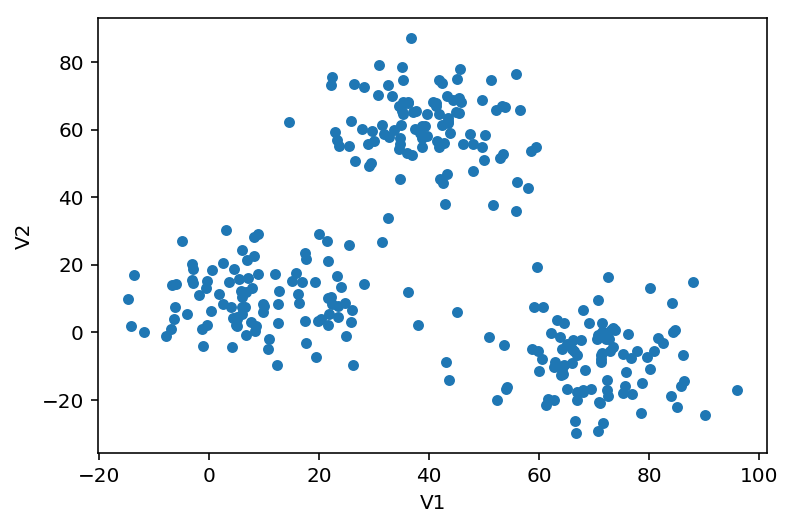

In [74]:
test = data.sample(300)
test.plot.scatter('V1','V2')

### Run the code

In [75]:
labels, centers, loss = k_means(test,3,20)

Number of iterations: 3


### Plot the result

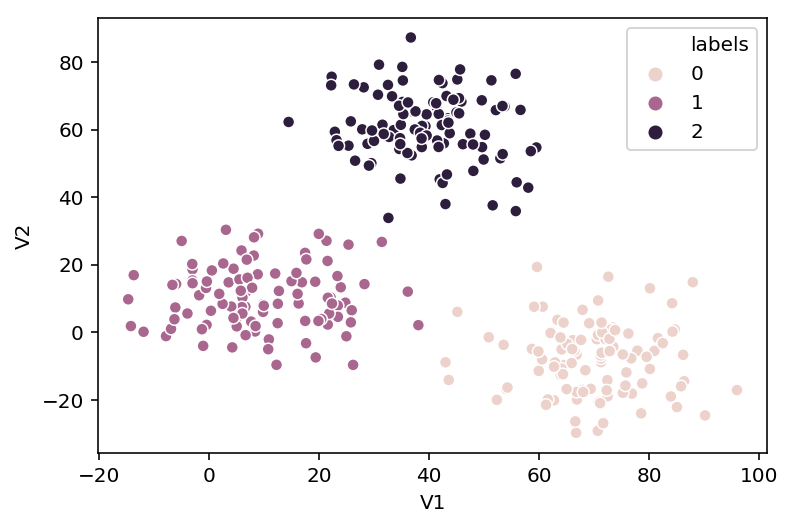

In [76]:
result=test.copy()
result['labels'] = labels
sns.scatterplot(x='V1',y='V2',hue = 'labels',data = result)

In [77]:
loss

3756.5184508851717

## Try a 3-D example

In [78]:
from sklearn.datasets import make_blobs

# Creating a sample dataset with 4 clusters
X, y = make_blobs(n_samples=800, n_features=3, centers=4)
data_3D = pd.DataFrame(X)

In [79]:
data_3D.head()

,0,1,2
0,-8.568030,5.515609,-9.835288
1,4.707024,-4.259904,6.754626
2,4.152522,-2.160238,8.299103
3,9.093690,-6.891798,6.315616
4,9.001830,-4.765363,4.956097


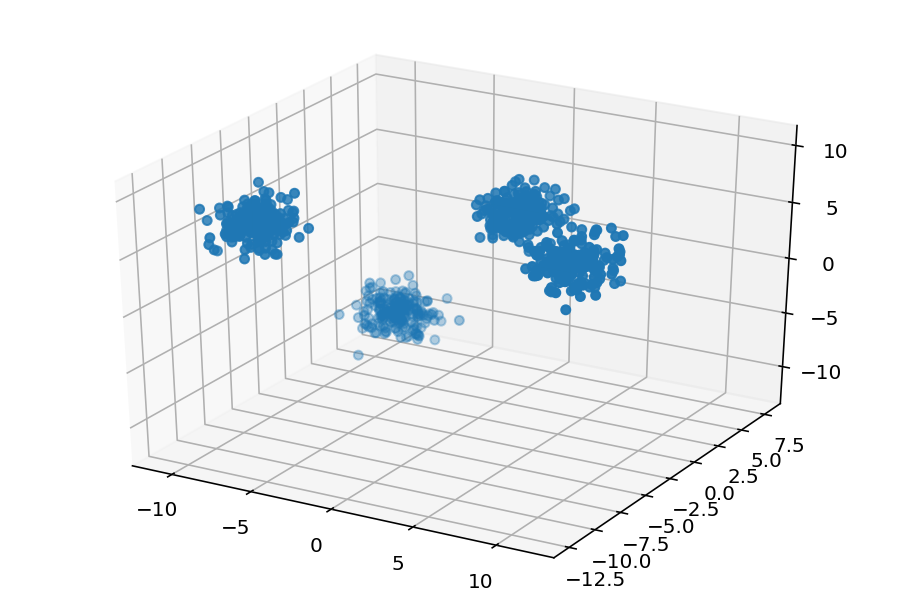

In [80]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

### Run the code

In [81]:
labels, centers, loss = k_means(data_3D,4,20)### Run the code

Number of iterations: 5


### Plot the result

In [82]:
result_3D = data_3D.copy()
result_3D['labels'] = labels
R = np.array(result_3D)

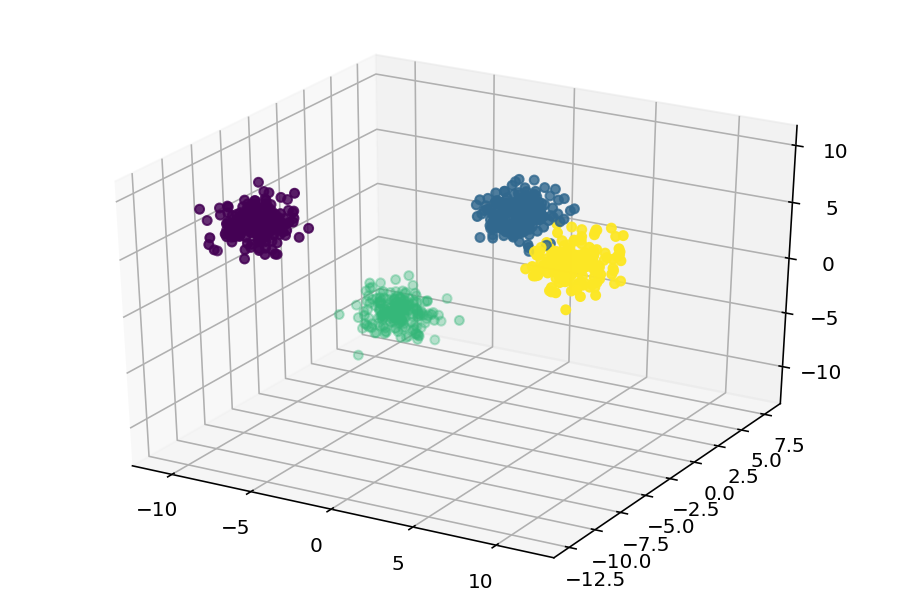

In [83]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(R[:, 0], R[:, 1], R[:, 2],c = R[:,3])

In [84]:
loss

1302.8169314557804